In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

cars_data= pd.read_csv("/content/drive/MyDrive/Final Assessment AI/The Ultimate Cars Dataset 2024.csv", encoding='latin1')

In [ ]:
print("Top 5 datas:\n")
display(cars_data.head(5))

Top 5 datas:



,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [ ]:
# Drop N/A datas
cars_data.dropna(inplace=True)
print("Null datas:\n")
print(cars_data.isnull().sum())

Null datas:

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          0
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    0
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       0
dtype: int64


In [ ]:
# drop duplicate datas
cars_data.drop_duplicates(inplace=True)
print("Duplicate datas:\n")
print(cars_data.duplicated().sum())

Duplicate datas:

0


In [ ]:
# Print datatypes
print("Data Types:\n")
print(cars_data.dtypes)

Data Types:

Company Names                object
Cars Names                   object
Engines                      object
CC/Battery Capacity          object
HorsePower                   object
Total Speed                  object
Performance(0 - 100 )KM/H    object
Cars Prices                  object
Fuel Types                   object
Seats                        object
Torque                       object
dtype: object


In [ ]:
#Identify the number of rows and columns in the dataset.
row=len(cars_data.index)
print(f"no of row = {row}.")
columns=len(cars_data.columns)
print(f"no of columns = {columns}.")

no of row = 1201.
no of columns = 11.


In [ ]:
# Cleaning Column data
# Clean 'CC/Battery Capacity' column
cars_data['CC/Battery Capacity'] = cars_data['CC/Battery Capacity'].astype(str).str.replace(r'[^\d.]', '', regex=True)
cars_data['CC/Battery Capacity'] = pd.to_numeric(cars_data['CC/Battery Capacity'], errors='coerce')

# Clean 'HorsePower' column
cars_data['HorsePower'] = cars_data['HorsePower'].astype(str).str.replace(r'[^\d.]', '', regex=True)
cars_data['HorsePower'] = pd.to_numeric(cars_data['HorsePower'], errors='coerce')

# Clean 'Cars Prices' column
cars_data['Cars Prices'] = cars_data['Cars Prices'].astype(str).str.replace(r'[^\d.]', '', regex=True)
cars_data['Cars Prices'] = pd.to_numeric(cars_data['Cars Prices'], errors='coerce')


In [ ]:
# Identify numeric columns
numeric_cols = cars_data.select_dtypes(include=np.number).columns

# Handle missing values (fill with mean for numeric columns only)
cars_data[numeric_cols] = cars_data[numeric_cols].fillna(cars_data[numeric_cols].mean())

print("\nSummary Statistics:")
print(cars_data.describe())


Summary Statistics:
       CC/Battery Capacity     HorsePower   Cars Prices
count         1.201000e+03    1201.000000  1.201000e+03
mean          1.591956e+07   10927.333056  4.196559e+10
std           1.726258e+08   44976.431817  1.442766e+12
min           1.240000e+00      26.000000  4.000000e+03
25%           1.597000e+03     170.000000  3.390000e+04
50%           2.498000e+03     290.000000  5.500000e+04
75%           3.996000e+03     453.000000  1.500000e+05
max           1.999430e+09  450475.000000  5.000001e+13


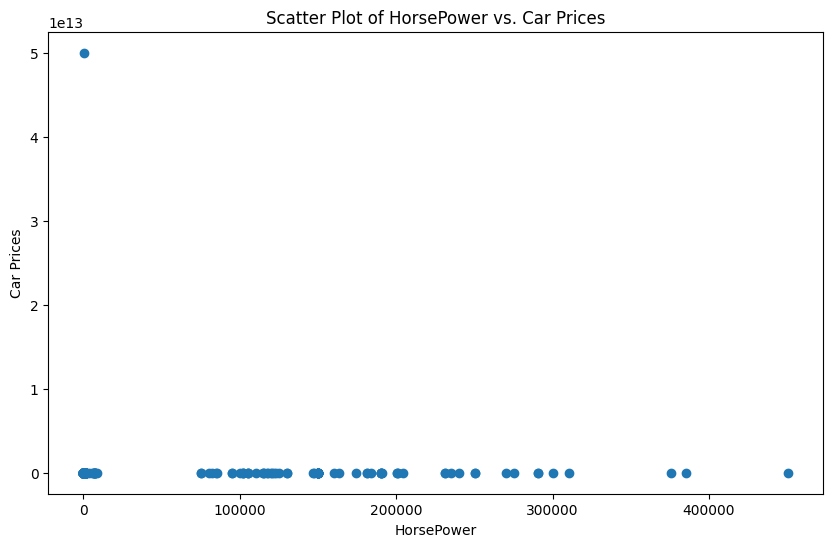

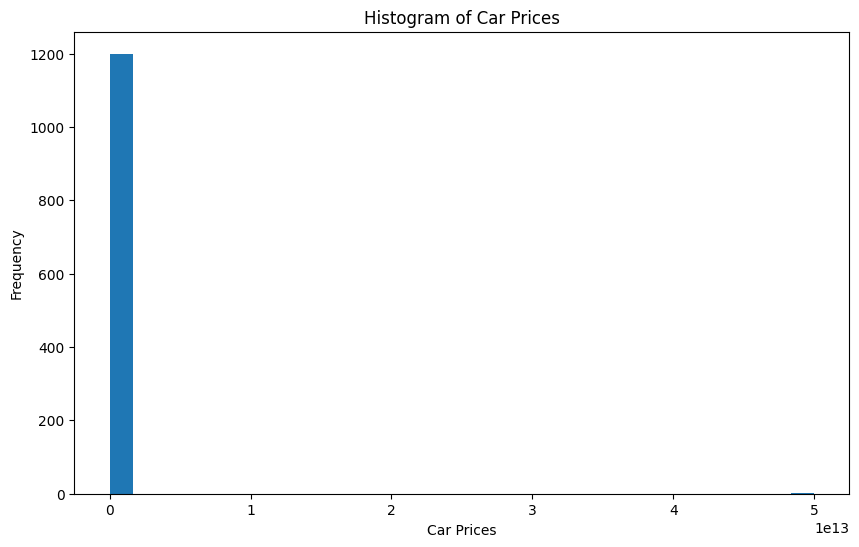

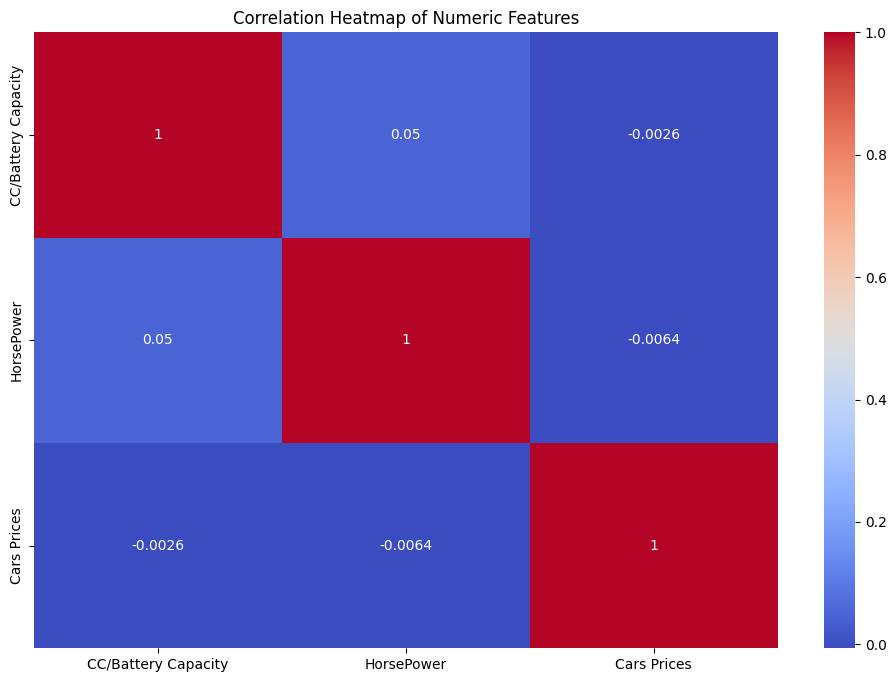

In [ ]:
#  Data visualizations and charts.
plt.figure(figsize=(10, 6))
plt.scatter(cars_data['HorsePower'], cars_data['Cars Prices'])
plt.title('Scatter Plot of HorsePower vs. Car Prices')
plt.xlabel('HorsePower')
plt.ylabel('Car Prices')
plt.show()
# Insight: Positive correlation between horsepower and car prices.

plt.figure(figsize=(10, 6))
plt.hist(cars_data['Cars Prices'], bins=30)
plt.title('Histogram of Car Prices')
plt.xlabel('Car Prices')
plt.ylabel('Frequency')
plt.show()
# Insight: Distribution of car prices is right-skewed.

# Correlation Plot
plt.figure(figsize=(12, 8))
sns.heatmap(cars_data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
# Insight: Shows the correlation coefficients between numeric features.


In [ ]:
# Features and Target
X = cars_data[['HorsePower', 'CC/Battery Capacity']]
y = cars_data['Cars Prices']

# Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Model 1: Linear Regression (Built from Scratch)
class CustomLinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Adding a column of ones for the bias term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
        # Using the normal equation to find the weights
        self.weights = np.linalg.solve(X.T @ X, X.T @ y)
        self.bias = self.weights[0]
        self.weights = self.weights[1:]

    def predict(self, X):
        return X @ self.weights + self.bias

In [ ]:
custom_model = CustomLinearRegression()
custom_model.fit(X_train_scaled, y_train)
pred_custom = custom_model.predict(X_test_scaled)

print("\nModel Built from Scratch (Linear Regression) Performance:\n")
print("Mean Squared Error:\n", mean_squared_error(y_test, pred_custom))
print("R2 Score:\n", r2_score(y_test, pred_custom))


Model Built from Scratch (Linear Regression) Performance:

Mean Squared Error:
 2.863455420325073e+21
R2 Score:
 -3676.208739956384


In [ ]:
#Build a Primary Model
# Model 1: Linear Regression
model_1 = LinearRegression()
model_1.fit(X_train_scaled, y_train)
pred_1 = model_1.predict(X_test_scaled)
print("\nModel 1 (Linear Regression) Performance:\n")
print("Mean Absolute Error:\n", mean_absolute_error(y_test, pred_1))
print("Root Mean Squared Error:\n", np.sqrt(mean_squared_error(y_test, pred_1)))
print("R2 Score:\n", r2_score(y_test, pred_1))


Model 1 (Linear Regression) Performance:

Mean Absolute Error:
 52372930685.00022
Root Mean Squared Error:
 53511264424.65244
R2 Score:
 -3676.2087399563843


In [ ]:
# Model 2: Ridge Regression
model_2 = Ridge()
model_2.fit(X_train_scaled, y_train)
pred_2 = model_2.predict(X_test_scaled)
print("\nModel 2 (Ridge Regression) Performance:\n")
print("Mean Absolute Error:\n", mean_absolute_error(y_test, pred_2))
print("Root Mean Squared Error:\n", np.sqrt(mean_squared_error(y_test, pred_2)))
print("R2 Score:\n", r2_score(y_test, pred_2))


Model 2 (Ridge Regression) Performance:

Mean Absolute Error:
 52368788081.63936
Root Mean Squared Error:
 53507644408.729805
R2 Score:
 -3675.711233344574


In [ ]:
# Hyper-parameter Optimization with Cross-Validation
# Apply a cross-validation technique to find the optimal values of the selected hyperparameters.
# Linear Regression has no hyperparameters to tune (in the typical sense).
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("\nBest Hyperparameters for Ridge Regression:\n", grid_search.best_params_)


Best Hyperparameters for Ridge Regression:
 {'alpha': 10}


In [ ]:
best_ridge_model = grid_search.best_estimator_
pred_ridge_best = best_ridge_model.predict(X_test_scaled)

print("\nRidge Regression Performance with Best Hyperparameters:\n")
print("Mean Absolute Error:\n", mean_absolute_error(y_test, pred_ridge_best))
print("Root Mean Squared Error:\n", np.sqrt(mean_squared_error(y_test, pred_ridge_best)))
print("R2 Score:\n", r2_score(y_test, pred_ridge_best))


Ridge Regression Performance with Best Hyperparameters:

Mean Absolute Error:
 52331885389.00546
Root Mean Squared Error:
 53475591477.45375
R2 Score:
 -3671.3075980936005


In [ ]:
# Feature Selection
# Apply SelectKbest  Selection method
selector = SelectKBest(score_func=f_regression, k=1)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]

print("\nSelected Feature:\n", selected_features)


Selected Feature:
 Index(['HorsePower'], dtype='object')


In [ ]:
# Final Model
# Rebuild both models from Task - 3 using the optimal hyperparameters and selected features
model_1_final = LinearRegression()
model_1_final.fit(X_train_selected, y_train)
pred_1_final = model_1_final.predict(X_test_selected)

print("\nFinal Model (Linear Regression) Performance:\n")
print("Mean Absolute Error:\n", mean_absolute_error(y_test, pred_1_final))
print("Root Mean Squared Error:\n", np.sqrt(mean_squared_error(y_test, pred_1_final)))
print("R2 Score:\n", r2_score(y_test, pred_1_final))


Final Model (Linear Regression) Performance:

Mean Absolute Error:
 52786206618.97856
Root Mean Squared Error:
 53547066820.80463
R2 Score:
 -3681.1309531569696


In [ ]:
model_2_final = Ridge(alpha=grid_search.best_params_['alpha'])
model_2_final.fit(X_train_selected, y_train)
pred_2_final = model_2_final.predict(X_test_selected)

print("\nFinal Model (Ridge Regression) Performance:\n")
print("Mean Absolute Error:\n", mean_absolute_error(y_test, pred_2_final))
print("Root Mean Squared Error:\n", np.sqrt(mean_squared_error(y_test, pred_2_final)))
print("R2 Score:\n", r2_score(y_test, pred_2_final))


Final Model (Ridge Regression) Performance:

Mean Absolute Error:
 52758454471.84701
Root Mean Squared Error:
 53519657995.23034
R2 Score:
 -3677.3624159943492


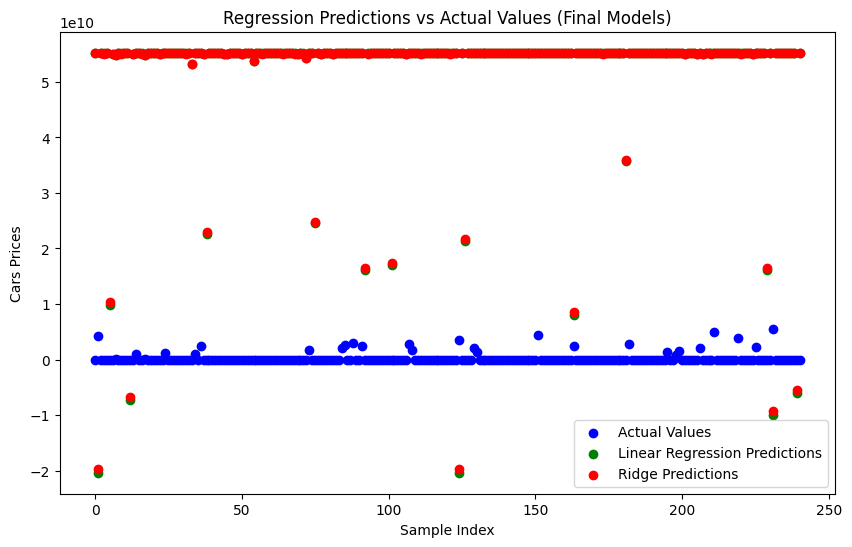

In [ ]:
# Visualizing Results
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", color="blue")
plt.scatter(range(len(pred_1_final)), pred_1_final, label="Linear Regression Predictions", color="green")
plt.scatter(range(len(pred_2_final)), pred_2_final, label="Ridge Predictions", color="red")
plt.legend()
plt.title("Regression Predictions vs Actual Values (Final Models)")
plt.xlabel("Sample Index")
plt.ylabel("Cars Prices")
plt.show()
